In [5]:
import numpy as np
from sympy  import Symbol,Add,Mul,Pow,Number,symbols
from sympy import  factor,srepr,sympify,expand,sqrt,simplify
import matplotlib.pyplot as plt

In [6]:
def create_dictionary(m):
    m_bin= bin(m)[2:][::-1]
    m_dict={}
    for i,value in enumerate(m_bin):
        m_dict[i]= int(value)
    p_dict={}
    p_dict[0]=1
    for i in range(1,int(np.ceil(len(m_bin)/2))):
        p_dict[i]= Symbol('p'+str(i))
    p_dict[int(np.ceil(len(m_bin)/2))-1]=1 # length half of m is being held.here need some generializtion to check out bit length of p and q optimum.

    q_dict={}
    q_dict[0]=1
    for i in range(1,int(np.ceil(len(m_bin)/2))):
        q_dict[i]= Symbol('q'+str(i))
    q_dict[int(np.ceil(len(m_bin)/2))-1]=1

    n=  len(m_bin) + int(np.ceil(len(m_bin)/2)) - 1
    z_dict={}
    for i in range(n):
        for j in range(i+1):
            if i != j:
                if i >= len(m_bin) :
                    pass
                elif j ==0 :
                    pass
                else :
                    if i-j >= int(np.ceil(len(m_bin)/2))-1  :
                        z_dict[(j, i)] = 0
                        
                    else:
                        z_dict[(j, i)] =  Symbol('z'+str(j)+str(i))

        z_dict[(len(m_bin)-4, len (m_bin)-1)] =0
    return m_dict , p_dict ,q_dict , z_dict

In [7]:
def max_sum(clause):
    max=0
    if clause.func == Add :
        for t in clause.args :
            if   isinstance(t, Number):
                max += int(t)
            
            if t.func == Mul :
                if  isinstance(t.args[0], Number) and t.args[0] >0 :
                    max= max+ (int(t.args[0])) 
                if isinstance(t.args[0], Number) and  t.args[0] <0 :
                    pass  
            elif t.func == Symbol  :
                
                max=max+1
            

            else :
                max = max+1
        

    elif clause.func == Mul :
        if  isinstance(clause.args[0], Number) and  clause.args[0] >0 :
            max =max+ int(clause.args[0])
        else :
            max+max+1

    elif clause.func == Symbol :
        max = 1
    elif isinstance(clause,Number):
        max=max+int(clause)

    return max

In [8]:
def create_clause(m,p,q,z):
    clauses=[]
    n=len(m)+int(np.ceil(len(m)/2)) -1
    for i in range(n):
        clause=0
        for j in range(i+1):
            clause+=q.get(j,0) * p.get(i-j,0)
        clause  += - m.get(i,0)
        for j in range(i+1):
            clause += z.get((j, i), 0)
        
        if type(clause) == int:
            clause = sympify(clause)
        if clause != 0:
            max_sum1=max_sum(clause)
            if max_sum1 !=0  :
                max_carry = int(np.floor(np.log2(max_sum1)))
            else : 
                max_carry  = 0
            for j in range(i + max_carry + 2, n+1):
                if z.get((i, j), 0) != 0:
                    z[(i, j)] = 0

        for j in range(i, 2*i+1):
            clause += - 2**(j-i) * z.get((i, j), 0) 

        
        if clause ==0 :
            clause = sympify(clause)
        clauses.append(clause)

    return clauses

In [9]:
def simplify_clause(clause, equation,i):
    
    clause=clause.subs(equation).expand()
    

    if clause.func == Add:
        for t in clause.args:
            if t .func == Mul and 'Pow' in  srepr(t):
                for s in t.args:
                    if s.func  == pow:
                        clause=clause.subs({s: s.args[0]})
            if t.func == pow :
                clause=clause -t +t.args[0]

            else :
                f_clause = factor(clause)
                if f_clause .func == Mul :
                    if isinstance(f_clause.args[0],Number):
                        clause = clause /f_clause.args[0]
    if i == 1:
        equation=rule_1(clause,equation)
        clause=clause.subs(equation).expand()
        num=max_sum(clause)
    if i == 2:
        equation=rule_2(clause,equation)
        clause=clause.subs(equation).expand()
        num=max_sum(clause)
    
    if i == 3:
        equation=rule_3(clause,equation)
        clause=clause.subs(equation).expand()
        num=max_sum(clause)
    if i == 4:
       equation=rule_4(clause,equation)
       clause=clause.subs(equation).expand()
       num=max_sum(clause)
       #print(clause,equation)

    if i == 5:
       equation=rule_5(clause,equation)
       clause=clause.subs(equation).expand()
       num=max_sum(clause)
    
     #  print(clause,equation)
    #equation=rule_3(clause,equation)
    #clause=clause.subs(equation).expand()
    

    return  clause ,equation

In [10]:
def rule_1(clause,expression):
    negative =[]
  
    for t in clause.args :
        if t.func == Mul  and isinstance(t.args[0], Number)  and t.args[0]<0 :
            negative.append(t)
        

        
    if len(negative) >0 :
        for  t in negative:
            if   -t.args[0] >= max_sum(clause):
                var= t/t.args[0]
                expression[var] =0

    return expression

In [11]:
def clause_final(clauses):
    expression={}

    for f in range(3):
   #if f==0 :
   #  for p in range(len(clauses)):
   #     clauses[p] = expand(sympify(clauses[p]**2))
         
   #      for i in range(2,5):
   #          clauses[p]=sympify(str(clauses[p]) . replace('**'+str(i),''))
   #else :
   #   pass
       for i in range(1,6):
      #clauses = create_clause(m_dict, p_dict, q_dict, z_dict)
      #for c in range(len(clauses)):
      #   print(clauses[c])       
          for p in range(len(clauses)):

            clauses[p] ,expression=(simplify_clause(clauses[p], expression,i))
         
      #   print(clauses[p])
    clauses1=[]
    for p in range(len(clauses)):
       clauses1.append(clauses[p]**2)
    clause_final=sympify(sum(clauses1).expand())
    clause_final=sympify(str(clause_final) . replace('**2',''))

    return clause_final            


In [12]:
def retrieve_dict(clause_final):
    p_dict={}
    q_dict={}
    z_dict={}
    if clause_final.func==Add:
        for t in clause_final.args:
            if t.func==Mul  and type(t)!=int:
                for subterm in t.args :
                    if type(subterm)!= int :
                        for i in str(subterm).split('*'):
                            if 'p' in str(i):
                                for j in i.split('p'):
                                    #if len(p_dict[int(j)])!= 0:
                                        if j!='':
                                            p_dict[(j)] = i
  
                            elif 'q' in str(i):
                                for j in i.split('q'):
                                   #if len(q_dict[int(j)])!= 0:
                                        if j!='':
                                            q_dict[(j)] = i

                            elif 'z' in str(i):
                                for j in i.split('z'):
                                    #if len(z_dict[(j)])!= 0:
                                        if j!='':
                                            z_dict[(j)] = i
            if t.func !=Mul and type(t)!= int :
                if 'p' in str(t):
                    for j in str(t).split('p'):
                        if j!='':
                           #if len(p_dict[int(j)])!= 0:
                               p_dict[(j)] = str(t)
  
                elif 'q' in str(t):
                    for j in str(t).split('q'):
                        if j!='':
                           #if len(q_dict[int(j)])!= 0:
                                q_dict[(j)] = str(t)

                elif 'z' in str(t):
                    for j in str(t).split('z'):
                        if j!='':
                           #if len(q_dict[int(j)])!= 0:
                                z_dict[(j)] = str(t)
    
    num_variables= len(p_dict)+ len(q_dict) + len(z_dict)
    return  num_variables



In [14]:
def rule_2(clause, expression):
    if clause.func == Add and len(clause.args) ==3 and len(list(clause.free_symbols))==2 :
        sub_clause=clause.subs({list(clause.free_symbols)[0]: Symbol('x'),list(clause.free_symbols)[1]: Symbol('y')})
        rule= Symbol('x') + Symbol('y') -1
        if sub_clause -rule ==0 :
            expression[list(clause.free_symbols)[0] * list(clause.free_symbols)[1]] =0
            if 'q' in str(list(clause.free_symbols)[0]):
                expression[list(clause.free_symbols)[0]]= 1 - list(clause.free_symbols)[1]
            else :
                expression[list(clause.free_symbols)[1]]= 1 - list(clause.free_symbols)[0]
    return expression

def  rule_3(clause , expression):
    if clause.func == Add and len(clause.args) ==2 and len(list(clause.free_symbols))==2 :
        sub_clause=clause.subs({list(clause.free_symbols)[0]: Symbol('x'),list(clause.free_symbols)[1]: Symbol('y')})
        rule= Symbol('x') * Symbol('y') -1
        if sub_clause -rule ==0 :
            expression[list(clause.free_symbols)[0]]=1
            expression[list(clause.free_symbols)[0]]=1
    return expression


def  rule_4(clause , expression):
    count=0
    if clause.func == Add and max_sum(clause) == len(list(clause.free_symbols)):
        for t in clause.args :
            if t.func != Mul :
                expression[t] =0
    
    else :
        for t in clause.args :
            if isinstance(t,Number):
                count= count+t
        if clause.func == Add and  len(list(clause.free_symbols)) ==- count :
            for t in clause.args :
                if t != count :
                    expression[t] = 1

    return expression  
def rule_5(clause, known_expressions):
    
    if clause.func == Add and len(clause.args) == 2:
        if len(clause.args[0].free_symbols) == 0:
            constant_a = clause.args[0]
            if clause.args[1].func == Mul:
                constant_b = clause.args[1].args[0]
                symbol = clause.args[1] / constant_b
                if isinstance(constant_a,Number) and isinstance(constant_b,Number):
                    if constant_a > 0 or constant_b < 0:
                    
                       known_expressions[symbol] = 1
    return known_expressions

In [15]:
def num_variables_final(factor):
    m_dict,p_dict,q_dict,z_dict= create_dictionary(factor)
    clauses= create_clause(m_dict,p_dict,q_dict,z_dict)
    clause_final1=clause_final(clauses)
    num_variables=retrieve_dict(clause_final1)

    return num_variables

In [17]:
import matplotlib.pyplot as plt

In [18]:
def is_prime(factor):
    for n in range(2,int(factor**0.5)+1):
        if factor%n==0:
            return False
    return True

In [ ]:
l=[]
for i in range(20,400):
    if is_prime(i):
        l.append(i)
f=[]
for i in range(len(l)):
    for j in range(i+1,len(l)):
        if i!=j:
            f.append(l[i]* l[j])
print(f)

x=[]
y=[]
for i in range(len(f)):
    
    num_variables=num_variables_final(f[i])
    print(num_variables)
    x.append(f[i])
    y.append(num_variables)
    
a=plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([2,100000])
axes.set_ylim([0,140])
axes.scatter(x,y)
plt.show()       

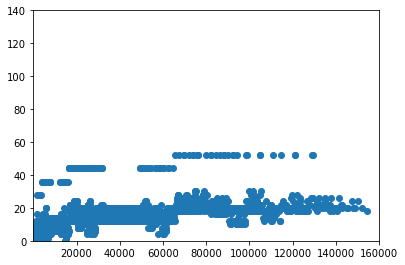

In [25]:
z=[]
for i in range (len(y)):
    z.append(2*y[i])
a=plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([2,160000])
axes.set_ylim([0,140])
axes.scatter(x,z)
plt.show()      